In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 500))

df = pd.read_csv("../../minimal_data/IoT_vehicleCount_7D_1S.csv")
df['vehicleCount'] = scaler.fit_transform(df['vehicleCount'].values.reshape(-1,1))

In [40]:
df

,second,vehicleCount
0,1,0.000000
1,1,0.000000
2,1,0.000000
3,1,0.000000
4,1,0.000000
...,...,...
604795,1,0.060728
604796,1,0.053137
604797,1,0.037955
604798,1,0.030364


In [41]:
df = df.groupby(np.arange(len(df))//60).mean()
df.vehicleCount = df.vehicleCount.astype(int)
df

,second,vehicleCount
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
10075,1,3
10076,1,3
10077,1,2
10078,1,1


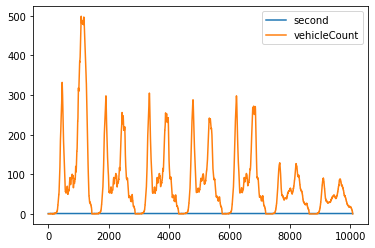

In [42]:
df.plot()

In [43]:
tmp_df = df[-2*24*60:].copy()
tmp_df

,second,vehicleCount
7200,1,0
7201,1,0
7202,1,0
7203,1,0
7204,1,0
...,...,...
10075,1,3
10076,1,3
10077,1,2
10078,1,1


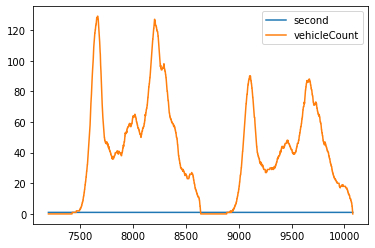

In [48]:
tmp_df.plot()

In [44]:
df = df[:-2*24*60]
df

,second,vehicleCount
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7195,1,5
7196,1,4
7197,1,2
7198,1,1


In [50]:
mdf = pd.concat([tmp_df, df], ignore_index=True)
mdf

,second,vehicleCount
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
10075,1,5
10076,1,4
10077,1,2
10078,1,1


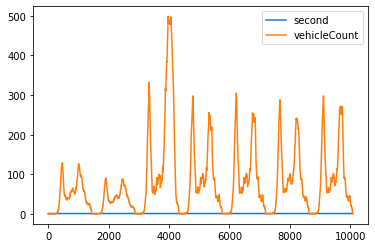

In [51]:
mdf.plot()

In [53]:
mdf.to_csv("../../minimal_data/IoT_1min_mean_0_500.csv")